# Random Forest

Random Forest yöntemi, Leo Breiman tarafından 2001 yılında geliştirilmiş bir yapay öğrenme tekniğidir. Makine öğrenmesinin 2 temel kaygısından bahsedecek olursak, birincisi **genellenebilirlik**, diğeri ise **aşırı öğrenme** durumudur.

    Random Forest’ın temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

<p align="center">
  <img src="grafikler/rf1.png" height=300 >
</p>

Leo Breiman daha öncesinde CART (Classification & Regression Tree) yöntemini geliştirmiştir. CART yöntemi oldukça iyi öğrenme kapasitesi olan bir yöntemdir. Bu sebeple **aşırı öğrenmeye** meyilli bir yöntemdir. 

Breiman aşırı öğrenmeye olan meyili çözmek için CART yönteminde dallanmayı belirli bir noktada kesmek için bir takım yaklaşımlar geliştirmişti. Bunlara ek olarak başka çalışmalar da yürütmüştür. Bu çalışmaların sonucunda yine kendi geliştirdiği yöntemler olan **bagging (boostrap aggregating)** ve **random subspace** yöntemlerini kullanarak **random forest**'ı ortaya çıkarmıştır.

    Daha iyi anlayabilmek için ensemble yöntemler'i detaylıca açıklayalım.

## Ensemble Yöntemler (Topluluk Öğrenmesi)

### 1. Enseble Yöntemler Nedir? Bir Benzetme

Sınıflandırma algoritmaları ile bir nesnenin hangi sınıfa dahil olacağını tahmin etmeye çalışırız. Birçok sınıflandırma yöntemi arasından probleme uygun olanı seçer, gerekli optimizasyonları yapar ve yüksek doğruluk oranlarını yakalamaya çalışırız. 

Peki bu işi 3-5 tane sınıflandırıcı (algoritma) ile yapsak veya aynı sınıflandırıcıyı aynı eğitim setinin farklı alt kümeleri ile eğitsek ve her birine gözlemin tahmin değerini sorarsak, sonucun daha iyi olacağı düşünebiliriz. Topluluk Öğrenmesi ile bu işi yapıyor, tek sınıflandırma probleminde birden fazla sınıflandırıcı (algoritma) kullanılıyoruz. Bu yöntem regresyon problemlerinde de kullanılabilir pek tabi.

Bu yöntemde farklı doğruluk skorlarına sahip sınıflandırıcıların (algoritmaların) sonuçları farklı yöntemlerle (oylama, ortalama vb.) birleştiriliyor. Böylelikle tek bir sınıflandırıcıdan (algoritmadan) daha iyi sonuçlar elde etme imkanı bulunuyor.

    Konuyu daha iyi anlayabilmek için bir benzetme ile başlayalım:

Yıllardır pasaport gişesinde görev yapan memurlar artık pasaport kontrolü için gişeye yaklaşan insanların hal, hareket ve tavırlarından pasaport ile ilgili herhangi bir sıkıntısı olup olmadığını anlar olmuşlar. Kendilerince bir deney yapmışlar. Her memur gişeye yaklaşan yolcunun pasaport sıkıntısı olup olmadığını tahmin etmiş, sonra da bireysel tahminler grup tahminleri ile karşılaştırılmış. Sonuçta grup tahminlerinin birey tahminlerinden daha iyi olduğunu farketmişler. Şimdi analojimizi ensemble yönteme uyarlayalım. Birinci memur Karar Ağacı, ikinci memur KNN ve üçüncü memur da Lojistik Regresyon olsun. Yaklaşan bir yolcu için;

* Birinci memur (Karar Ağacı): SORUNLU

* İkinci memur (KNN): SORUNLU DEĞİL

* Üçüncü memur (Lojistik Regresyon): SORUNLU

kararı veriyor. Çoğunluk SORUNLU kararı verdiği için sonuç SORUNLU kabul edilir ve yaklaşan yolcu pasaport kontrolü yönünden SORUNLU olarak sınıflandırılır.

Bu örnekle, farklı bir grup insanın, bireylere kıyasla daha iyi kararlar vermesinin muhtemel olduğu sonucuna varabilirsiniz. Makine öğrenmesinde benzer olan şudur, tekli modellere kıyasla farklı modellerde daha iyi ve sağlıklı sonuçlar alırsınız. Makine Öğrenimindeki bu çeşitlilik, Topluluk Öğrenimi adlı bir teknikle gerçekleştirilir.

    Yazının bu kısmında sınıflandırma problemlerinde ensemble yöntemlerin ana fikri anlaşılmıştır.

    Ensemble Yöntemler sadece doğruluğu yükseltmekle kalmamakta, ezber bozmanın yanı sıra (aşırı öğrenmenin önüne geçiyor), sapma (bias) ve varyans hatasını da azaltmaktadır. 

In [4]:
# Random Forest, aslında karar ağacının ensemble modelidir. 
# CART yönteminde sadece bir ağaç kullanılırken, Random Forest birden çok ağaç kullanır.

# Şunu da unutmamak gerekir; ensemble yöntem kullanıldığında sonuç tek bir sınıflandırıcıdan daha iyi olmalıdır 
# aksi halde ensemble yöntem kullanmanın anlamı kalmaz. 
# Çünkü tek bir sınıflandırıcıya göre ensemble yöntemin hesaplama maliyeti daha yüksektir.

    Özetle söyleyecek olursak ensemble yöntemler; tek bir modele kıyasla daha güçlü ve genellenebilir sonuçlar elde etmek amacıyla birden fazla baz modelin tahmin sonuçlarını birleştirir. Bu yöntemlerin başarısı iki ölçüte göre olur; temel öğrenicilerin (base learner) öğrenme başarısı ve birbirlerinden farklılıklarıdır.

NOT: Yukarıda topluluk öğrenmesini (ensemble yöntemleri) sınıflandırma problemi üzerinden örneklendirdik. Lakin topluluk öğrenmesi regresyon problemlerinde de kullanılabilir.

### 2. Ensemble Yöntemler Hangi Hallerde Kullanılır?

Tek bir algoritma ezbere başvurduğunda.

Elde edilecek sonuç ilave hesaplama yapmaya değecek kadar yüksekse.

### 3. Ensemble Yöntemler Nelerdir?
Başka yöntemlerde olmakla beraber yaygın olarak kullanılan yöntemler aşağıda listelenmiştir.

- Bagging
- Random Subsample
- Boosting

#### 3.1. Bagging (Bootstrap Aggregating)

Bu yöntemde, temel öğrenicilerin (base learner) herbiri, eğitim setinin rastgele seçilen farklı alt kümeleriyle eğitilir. Veri, önce eğitim ve test olarak ayrılır. Daha sonra eğitim için ayrılan veri setinden rastgele seçim yapılır ve her bir öğrenicinin çantasına konur. Torbadan çekilen topun torbaya tekrar konması gibi seçilenler tekrar seçilebilecek şekilde eğitim kümesinde kalmaya devam eder. Seçilen miktar eğitim için ayrılandan fazla değildir (genelde %60). 

<p align="center">
  <img src="grafikler/rf2.png" height=400 >
</p>

Farklı eğitim setlerinin seçilmesindeki amaç karar farklılıkları elde ederek başarıyı yükseltmektir. Model farklı eğitim setiyle oluşunca doğal olarak kararlarda da bir miktar farklılık oluşacaktır. Kararlar daha sonrasın da birleştirilir. Eğer ki problem, sınıflandırma problemi ise maximum oylama (Max Voting) birleştirilebilir. Problemimiz bir regresyon problemi ise ortalama (averaging) veya ağırlıklı ortalama(weighted averaging) ile birleştirilebilir.

Daha sistematik ifade etmek istersek;

* Orijinal veri kümesinden çoklu alt kümeler oluşturulur.
* Bu alt grupların her birinde bir temel model (zayıf model) oluşturulmuştur.
* Modeller paralel olarak çalışır ve birbirinden bağımsızdır.
* Nihai tahminler, tüm modellerden gelen tahminler birleştirilerek belirlenir.

<p align="center">
  <img src="grafikler/rf3.png" height=400 >
</p>

    
    Bagging'de öne çıkan seçim işlemi gözlemler üzerinden yapılır. Değişkenler üzerinden değil.

#### 3.2. Random Subspace (Rastgele altuzaylar)

Yukarıda öğrenicilerin verdiği kararların birbirinden farklı olması gerektiğini söylemiştik. Rastgele altuzaylar yöntemi ile öğrenicinin (algoritmanın) bütün değişkenler ile çalışmasının önüne geçerek, bir kısıtlama ile yani rasgele değişkenler üzerinden öğrenme sağlayarak kararlarda çeşitlilik sağlanması amaçlanmaktadır. 

Bu yöntemde, gözlemlerin seçimiyle ilgili bir kısıtlama yoktur. Rastgele altuzaylar için bu farklılık farklı değişkenlerin seçimiyle sağlanıyor. Burada her öğreniciye, değişkenler (feature) kümesinin değişik alt kümeleriyle öğrenme yaptırılır. Yani eğitim esnasında bazı sütunlar seçilir bazıları seçilmez. Genelde değişkenlerin yarısı seçilir. 

Breiman, tıpkı Bagging tekniğinde rastgele gözlem birimleri üzerinden elde ettiği rastgeleliği, değişkenler için de edinmek amacıyla, değişkenlerde rastgele seçimler yaparak **Random Subspace** tekniğini geliştirmiştir.

Random Subspace tekniğinde, örnek olarak veri setinde N adet değişkenin var olduğu durumda, N’den daha az bir sayıda rastgele değişken seçilerek Bagging yönteminde oluşturulan her bir ağaç için, dallanmaların bu seçilen rastgele değişkenler üzerinden yapılması sağlanır. Bunun sonucunda değişkenler sayesinde de rastgelelik elde edilmiş olur.

    Random Subspace'te öne çıkan seçim işlemi değişkenler üzerinde yapılır.


In [5]:
# Böylelikle Breiman Bagging ve Random Subspace yöntemlerini birleştirerek Random Forest tekniğini oluşturdu.
# Hem gözlem birimlerinde hem de değişkenlerde rastgeleliği sağlayarak,
# CART algoritmasındaki aşırı öğrenme meyiline karşı çözüm üretmiş oldu.

#### 3.3. Boosting

Bagging yönteminin farklı bir versiyonudur. Farkı ise; öğrenme sonuçlarının bir sonraki öğrenici (algoritma) için kullanılıyor olmasıdır. Diğer yöntemlere göre daha yaygındır, hızlı çalışır az bellek kullanır. 

Eğitim için ayrılan veri setinden bir temel öğrenici için rastgele seçim yapılır. Öğrenme gerçekleşir, model test edilir. Sonuçlardan yanlış sınıflandırılan örnekler belirlenir. Bunlar bir sonraki öğrenici için örnek seçiminde **önceliklendirilir (seçilme olasılıkları arttırılır)**. Her seferinde bu bilgi güncellenir. Bagging yönteminde her bir örneğin seçilme şansı eşittir.

        Bir başka şekilde ifade etmek istersek;

    Bagging ile Boosting yöntemlerinin en belirgin farkı, bagging yöntemlerinde ağaçların birbirlerine bağımlılıkları yoktur. Boosting yönteminde ise ağaçlar artıklar (residuals/hatalar) üzerine kurulur dolayısıyla ağaçların birbirlerine bağımlılıkları söz konusudur.


In [6]:
# Boosting yöntemleri ise tek bir cümle ile ifade edilecek olursa;
# Artık (hata) optimizasyonuna dayalı performans arttırmaya çalışır.  


# Yani modeller adaptiftir. Kümülatif bir hata değerlendirme söz konusudur. 
# Boosting de bir metodoloji olarak görülmelidir. 

# AdaBoost, Gradient Boosting Machines, XGboost özelliklerini bu “boost” etme yaklaşımından almıştır. 
# Temelinde, zayıf sınıflandırıcıları bir araya getirilmesi fikri vardır. 

# Bu fikrin algoritmik karşılığı ise tek bir tahminsel model formunda olan modeller serisi oluşturmaktır. 
# Seri içerisindeki bir model, serideki bir önceki modelin tahmin artıklarının/ hatalarının üzerine kurularak fit edilir. 
# İşte burada adaptif learning kavramı daha iyi anlaşılacaktır. Ağaçlar bağımsız değil bağımlıdır.

    Netice olarak birden fazla ağaç ile çalışmak, gözlem ve değişken seçiminde rassallığı kullanmak, bağımsız ağaçlar ya da bağımlı ağaçlar oluşturmak fikirlerinin harmanlanarak zirveye ulaştığı algoritmalar GBM, XGboost ve LightGBM gibi algoritmalardır. En temelindeki çok ince konu ise RASSALLIK sağlamaya çalışmaktır.

## Random Forests Uygulama

In [7]:
# Kütüphanelerimizi import edelim;

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_tree
from catboost import CatBoostClassifier

In [8]:
# Ayarlarımızı yapalım;

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

In [9]:
# Veri setimizi okutalım ve bağımlı ve bağımsız değişkenlerimizi seçelim;

df = pd.read_csv("datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [10]:
# Random Forest model nesnemizi tanımlayalım ve hiper parametrelerine önden bir bakış atalım;

rf_model = RandomForestClassifier(random_state=17)

rf_model.get_params()

# Aşağıdaki parametrelerin bazılarını açıklayalım;


# max_features; bölünmelerde göz önünde bulundurulacak değişken sayısıdır. Ön tanımlı değeri otomatik olarak tanımlanmış
# max_depth, min_samples_split hiper parametrelerini CART bölümünden biliyoruz.

# Bir de n_estimators hiper parametresi var. Bu hiper parametre de fit edilecek bağımsız ağaç sayısını ifade etmektedir.
# Ön tanımlı değeri 100'dür.

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [11]:
# Şimdi modelimizi train ve test diye ayırmadık, bu sebeple cross validation da yaparak modelimizi eğitelim,
# Model çıktılarını inceleyelim.

cv_results = cross_validate(rf_model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

In [12]:
# Accuracy ortalamalarına bakalım;

cv_results['test_accuracy'].mean()

0.753896103896104

In [13]:
# f1 skoru ortalamalarına bakalım;

cv_results['test_f1'].mean()

0.6190701534636385

In [14]:
# AUC değeri ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

0.8233960113960114

    Yukarıda bir takım hiper parametrelerden bahsettik. Önceki bölümlerdeki gibi bu hiper parametrelerde değişiklik yapabiliriz. Dolayısıyla bir hiper parametre seti oluşturarak, en iyi parametreleri arayabiliriz.

In [15]:
# Hiper parametre setini tanımlayalım;

rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}

# Yukarıdaki hiper parametre setini tanımlarken dikkat edilmesi gereken bir kaç noktadan bahsetmek gerekir;

# Hiper parametre setine ön tanımlı değerler eklenmelidir. 
# Zira denediğimiz diğer hiper parametreler ile bir karşılaştırılma yapmak isteriz.

# Bir diğer nokta ise "max_features" veri setindeki değişken sayısından daha fazla olmamalıdır.
# Yoksa hata alınır.

In [16]:
# Yukarıda tanımladığımız hiper parametreleri "GridSearchCV()" fonksiyonu ile değerlendirelim;

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [17]:
# Modele ait en iyi hiper parametreleri getirelim;

rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 8,
 'n_estimators': 500}

In [18]:
# En iyi hiper parametreler ile final modeli tanımlayalım;

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

In [19]:
# Final modeline de 10 katlı cross validation uygulayalım;

cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

In [20]:
# Accuracy ortalamalarına bakalım;

cv_results['test_accuracy'].mean()

0.766848940533151

In [21]:
# f1 skoru ortalamalarına bakalım;

cv_results['test_f1'].mean()

0.6447777811143756

In [22]:
# AUC değeri ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

0.8271054131054132

In [23]:
# Önceki değerlerimizi bir hatırlayalım;

# test_accuracy   : 0.7538
# f1 score        : 0.6190
# AUC değeri      : 0.8233

In [24]:
# Önceki bölümlerden, özelliklerin önemini gösteren bir fonksiyonumuzu çağıralım;

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

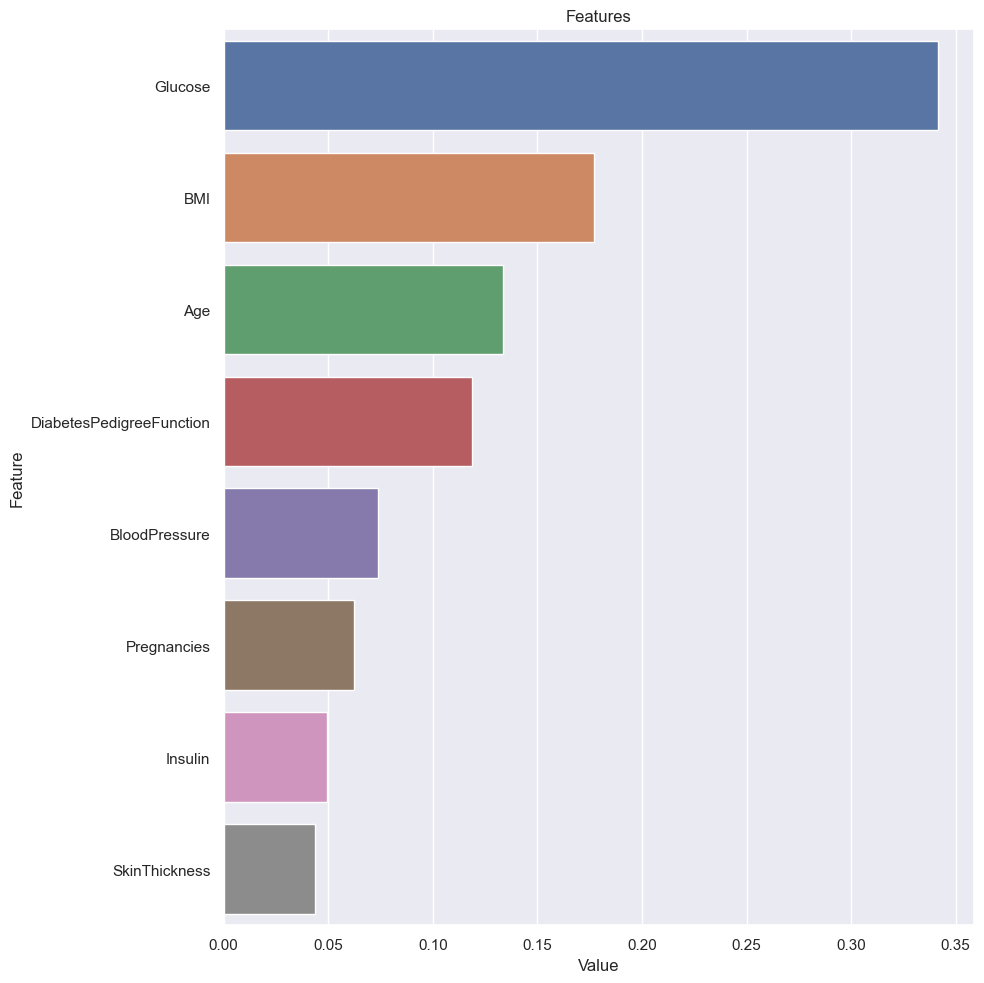

In [25]:
plot_importance(rf_final, X)

In [26]:
# Model karmaşıklığını inceleyen bir diğer formulümüzü yeniden tanımlayalım;

def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

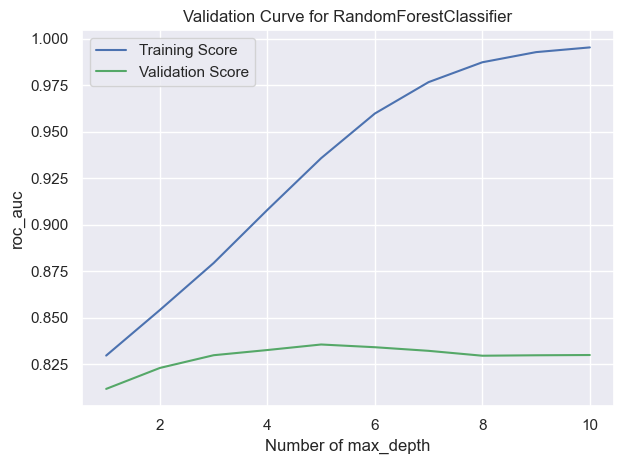

In [27]:
val_curve_params(rf_final, X, y, "max_depth", range(1, 11), scoring="roc_auc")

# Gradient Boosting Machines (or Gradient Boosted Trees)

GBM (Gradient Boosting Machines) hata (residual) optimizasyonuna dayalı çalışan bir ağaç yöntemidir. 

        Kısaca, ağaç yöntemlerine boosting ve gradient descent'in uygulanmasıdır.

### Adaptive Boosting

GBM'i tam olarak açıklamadan önce "Adaptive Boosting (AdaBoost) nedir?" onu açıklayacağız. AdaBoost GBM'in temellerini oluşturan bir yöntemdir. AdaBoost, zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrine dayanır.

Aşağıdaki görselden karar ağacının eksenler üzerindeki ifadesini bir hatırlayalım.

<p align="center">
  <img src="grafikler/cart3.png" height=300 >
</p>

        Aşağıdaki gibi bir kaç eksen gösterilmiş olsun. Amacımız pozitif ve negatif sınıfları doğru sınıflandırmaktır. Aşağıda "+" işaretleri bir sınıfı, "-" işareti bir diğer sınıfı ifade etmektedir. Her kutudaki sınıflandırmaları teker teker inceleyeceğiz.

        Mavinin içindeki maviler (yani "+" işaretleri) ve kırmızının içindeki kırmızılar (yani "-" işaretleri) doğru sınıflandırılmıştır. Mavinin içindeki "-" işaretleri veya kırmızının içindeki "+" işaretleri yanlış sınıflandırılmıştır.

<p align="center">
  <img src="grafikler/gbm1.png" height=400 >
</p>

* **Birinci kutuya (Box 1) bakacak olursak,** çizilen çizginin solundaki "+" işaretleri ve çizginin sağındaki "-" işaretleri doğru sınıflandırılmış, ama çizginin sağındaki "+" işaretleri ise yanlış sınıflandırılmıştır. Çizilen ilk çizginin sonucunda pozitiflerin 3 tanesinin yanlış sınıflandırıldığını görebiliyoruz.

* *Önceki hata sonucu dikkate alınarak,* çizginin yeri değiştirilmiştir. **İkinci kutuya (Box 2) bakacak olursak,** çizilen çizginin solundaki "+" işaretleri ve çizginin sağındaki "-" işaretleri doğru sınıflandırılmış, ama çizginin solundaki "-" işaretleri ise yanlış sınıflandırılmıştır. Çizginin yerinin değiştirilmesi sonucunda "+" olanların hepsi doğru tahmin edilmiş olsa da, bu sefer de 3 adet "-" değer yanlış tahmin edilmiştir.

* Bu hatadan da ders çıkarılarak, yatay bir çizgi çekilmiştir. **Üçüncü kutuya (Box 3) bakacak olursak,** çizilen çizginin üstündeki "+" işaretleri ve çizginin altındaki "-" işaretleri doğru sınıflandırılmış, ama çizginin altındaki "+" işaretleri ise yanlış sınıflandırılmıştır. Oluşturulan yatay çizginin sonucunda belirli bölgelerde daha az hata yapılmıştır. Mavi bölgede bir tane yanlış sınıflandırılmış "-" değer, kırmızı bölgede ise 2 tane yanlış sınıflandırılmış "+" değer bulunmaktadır.

Dolayısıyla bir sonraki basamakta (Box 4) üç sınıflandırıcı ağırlıklandırılarak bir araya getirilmiştir. Burada aslında bir topluluk öğrenme yaklaşımı vardır. Lakin bu topluluk öğrenmesi hatalardan ders çıkarmaktadır. Yani yanlış sınıflandıran gözlemlerin doğru sınıflandırma çabasıyla ayrım noktaları hassaslaştırılmıştır. 

### GBM

    Buradaki çıkış noktamız, "Boosting yöntemleri optimizasyon problemi haline getirilebilir mi?" yani "Boosting yöntemlerini optimize edebilir miyiz?" olacaktır. Bu sorunun cevabı ise evettir. Boosting yöntemlerini optimize edebilir.

<p align="center">
  <img src="grafikler/gbm2.png" height=150 >
</p>

    Hatalar/artıklar üzerinden kurulan tahminsel modeller serisi ile en optimal model formuna ulaşmak isteriz.

In [28]:
# GBM ile boosting yöntemi optimizasyon problemi olarak ele alınmış ve 
# GBM, uygun bir cost fonksiyonu üzerinde çalıştırılabilen optimizasyon algoritması olarak konumlanmıştır. 

# Eğer türevlenebilir bir cost fonksiyonu var ise bunu gradient descent ile optimize edebiliriz. 
# Doğrusal regresyondan da hatırlayacak olursak, orda da bir cost fonksiyonumuz vardı ve 
# iteratif olarak türevini alarak hataların minimum değerini verecek şekilde ilerliyorduk.

    GBM yöntemi, Gradient Descent'in boosting yöntemine uyarlanmasıdır.

Özetle;

* GBM pratikte **"boosting yöntemi + gradient descent"** olarak düşünülebilir.

* Yani zayıf öğrenicileri bir araya getirerek, güçlü bir öğrenici oluşturma yani ağaçlar tahminde bulunduktan sonra onların hatalarına odaklanarak, bu hataların üzerine giderek ağaçları boost etme işlemidir.

* GBM ile hataların üzerine giderek ağaçları boost etme işlemi programatik olarak yapılmaktadır.

* Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.

* Seri içerisindeki bir model serideki bir önceki modelin tahmin artıkları (residual'ları) / hataları üzerinden fit edilir.

* GBM türevlenebilen herhangi bir loss function'ı optimize edebilen gradient descent algoritmasını kullanmaktadır.

* Tek bir tahminsel model formunda olan modeller serisi additive şekilde kurulur.


### Additive Modelling nedir?

Sol taraftaki grafiğe odaklanırsak, y bağımlı olmayan bir değişken olduğunu görüyoruz. x değişkeni ne olursa olsun y değişkeni hep 30'dur.

<p align="center">
  <img src="grafikler/gbm3.png" height=250 >
</p>

Bu sabit fonksiyonu x'e bağlı bir şekilde değiştirmek istersek; fonksiyona x ekleyebiliriz yani y = 30 + x diyebiliriz. Bu da bizi sağdaki grafiğe götürmektedir.

CART bölümünde aşağıdaki görselin sol tarafındaki gibi eksenlerle ifade edilen karar ağacı görmiştük. Burada biz çıktılarımızı belirli bölgelere ayırıyorduk. Peki biz ekseni sağdaki gibi lineer değil de non-lineer şekle getirebilir miyiz?

<p align="center">
  <img src="grafikler/gbm4.png" height=250 >
</p>

Görselin sağ tarafındaki gibi non-lineer hale getirebilmek için bölgelere ayırma işlemini daha hassas yapmamız gerekir.

    Peki biz bu x değişkenin etkisini daha da detaylandırmak istersek ne yapabiliriz?

x değişkeninin etkisini detaylandırarak daha hassas bir bölgeleme işlemi yapabiliriz. Bunun için ise x'i eğri haline getirecek, x^2, x^3, sin(x) veya cos(s) fonksiyonlara ihtiyacımız vardır. 

<p align="center">
  <img src="grafikler/gbm5.png" height=300 >
</p>

    Şimdi yukarıyı bir özetleyelim.

* İlk önce y = 30 şekilde bir fonksiyonumuz vardı.

* Daha sonrasında y = 30 fonksiyonuna x ifadesini ekleyerek y = 30 + x fonksiyonunu oluşturduk.

* Daha da sonrasında daha detaylı bir fonksiyon elde etmek istedik ve y = 30 + x + sin(x) fonksiyonunu oluşturduk.

Daha da detaylandırmak istersek bir x'e bağlı bir ifade daha ekleyebiliriz. Fark ettiyseniz örnek olarak verdiğimiz y = 30 fonksiyonuna devamlı olarak x'e bağlı başka fonksiyonlar ekliyoruz. Additive modelling en basit haliyle budur. Ulaşmak istediğimiz noktaya göre ilk fonksiyonumuza (F<sub>0</sub>) bir başka değişkene bağlı farklı fonksiyonlar ekliyoruz.

Buradaki değişkenimiz ise hatalar olacaktır. GBM ile hataların üzerinden fit etme işlemi gerçekleştirdiğimizi söylemiştik. Kabaca hatalar üzerinden bu şekilde bir fit etme işlemi gerçekleştiriyoruz. 

    Bu işlemi güzel bir görselle özetlemeye çalışalım;

<p align="center">
  <img src="grafikler/gbm6.png" height=300 >
</p>

Yukarıdaki görseldeki f<sub>0</sub> bizim ilk modelimiz olacak. Model ne demekti onu da hemen hatırlayalım. CART bölümünde belirli filtrelere göre ortalam değer oluşturuyorduk. Karar ağaçları en basit olarak böyle oluşuyordu.

Daha sonrasında "Δ1", "Δ2", "Δ3", "Δ4" vs. ile y'nin gerçek değerine yaklaşılmıştır. Buradaki deltalar hata fonksiyonlarıdır. İlk modelden sonra elde ettiğimiz hataları modelleyeceğiz. Bu modellenen hataları, ilk modelimize ekleyerek (çıkararak da olabilir) bu şekilde y'nin gerçek değerine yaklaşmaya çalışacağız.

    Yukarıdaki görseli fonksiyonel bir yapıda inceleyelim;

<p align="center">
  <img src="grafikler/gbm7.png" height=300 >
</p>

Yukarıda bahsettiğimiz bir ifadeyi hatırlayalım.

<mark>Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.</mark> 

* f<sub>0</sub> klasik CART'dan gelen ilk tahmin modelimiz olduğunu düşünelim.

* Δ<sub>1</sub> ise tahmin sonuçları ile gerçek değerler arasındaki farkların (hataların) üzerine kurulan modelin çıktısıdır.

* Δ<sub>2</sub> ise; Δ<sub>1</sub>'in f<sub>0</sub>'a eklenerek oluşturulan modelden elde edilen tahmin sonuçları ile gerçek değerler arasındaki farkların (hataların) üzerine kurulan modelin çıktısıdır.

* Bu bu şekidle Δ<sub>m</sub>'ye kadar gider. Additive modelling derken tam da bu kısımdan bahsediyoruz.

F<sub>0</sub> modeline ise ilk başta kurulan base learner modeli denir.

    Diyelim ki aşağıdaki gibi bir tablo olsun;

<p align="center">
  <img src="grafikler/gbm8.png" height=300 >
</p>

Çok basit bir tahminde bulunacak olursak büyün rent (y bağımlı değişkeninin) değerlerinin ortalamasını alırız. Zaten karar ağacında tahmin yaparken belirli bir filtrenin altındaki gözlemlerin ortalamasına bakıyorduk. rent değişkeninin ortalamasını aldığımızda 1418 değerine ulaşıyoruz. Buradaki hatalarımızı ise son sütunda görüyoruz.

Sağ taraftaki grafikteki çizgili yatay eksen (sabit) F<sub>0</sub>  fonksiyonudur. X ekseni SqFeet iken, y değişkeni ise rent'tir. Grafikten gözlemleri görebiliyoruz ve F<sub>0</sub>'dan ne kadar saptığını görebiliyoruz.

    Tablomuzu biraz ileri taşıyalım;

<p align="center">
  <img src="grafikler/gbm9.png" height=120 >
</p>

Yukarıdaki grafikte sqfeet değeri (bağımsız değişken) ve rent (bağımlı değişken) var. Daha sonrasında ilk tahmin edilen değerler olarak F<sub>0</sub> var. Bir sağdaki satırda ise hatalar bulunmaktadır. 

Peki biz ilk hatalarımızı bağımlı değişkenimiz gibi değerlendirelim. Bu yeni veri setinden yola çıkarak, bağımsız değişkendeki (rent) gözlemlerimizi bölerek daha sonrasında da en düşük SSE'ye ait olan noktanın 900 sqfeet olduğunu düşünelim.

<p align="center">
  <img src="grafikler/gbm10.png" height=190 >
</p>

Bu bölme işleminden sonra; 

<p align="center">
  <img src="grafikler/gbm11.png" height=190 >
</p>

Yukarıda kalan 4 gözlemin ortalaması ise -145.5'tur. Buradan hareketle Δ<sub>1</sub> fonksiyonu oluşur. Daha sonrasında F<sub>0</sub> base learner'ı ile Δ<sub>1</sub> fonksiyonunun toplanması sonucunda F<sub>1</sub> fonksiyonu oluşur.

F<sub>1</sub> fonksiyonu ile rent (bağımlı değişken) arasındaki farklar ise bir sağ (yedinci) sütunda gösterilmiştir. Yedinci sütun artık bizim yeni bağımlı değişkenimiz olmuştur.

<p align="center">
  <img src="grafikler/gbm12.png" height=190 >
</p>

Biz ikinci hatalarımızı da bağımlı değişkenimiz gibi değerlendirelim. Bu yeni veri setinden yola çıkarak, bağımsız değişkendeki (rent) gözlemlerimizi bölerek daha sonrasında da en düşük SSE'ye ait olan noktanın 850 sqfeet olduğunu düşünelim.

<p align="center">
  <img src="grafikler/gbm13.png" height=190 >
</p>

Yukarıda kalan 2 gözlemin ortalaması  -92.5 iken aşağıda kalan 3 gözlemin ortalaması ise 61.7'dir. Bu işlemler sonucunda Δ<sub>2</sub> fonksiyonu oluşur. Daha sonrasında F<sub>1</sub> fonksiyonu ile Δ<sub>2</sub> fonksiyonunun toplanması sonucunda F<sub>2</sub> fonksiyonu oluşur.

F<sub>2</sub> fonksiyonu ile rent (bağımlı değişken) arasındaki farklar ise bir sağ (yedinci) sütunda gösterilmiştir. Yedinci sütun artık bizim yeni bağımlı değişkenimiz olmuştur. Buradan hareketle Δ<sub>3</sub> fonksiyonunu hesaplamak hiç de zor değildir. Δ<sub>3</sub> ile F<sub>2</sub>'nin toplanması sonucu F<sub>3</sub> fonksiyonu oluşur.

Aşağıda hatalar (y -F<sub>i</sub>) ve residual modellerinin grafiklerini görebiliyoruz. İlk grafikte hataların görece fazla olduğunu ve residual modelinin de hataları tahmin etme de başarısız olduğunu görüyoruz. İteratif şekilde rasidual'lar modellenerek gerçek değerler ile tahmin değerleri arasındaki var minimize hale getirilmiştir.

<p align="center">
  <img src="grafikler/gbm14.png" height=250 >
</p>

Yukarıda türevlenebilir bir cost fonksiyonu oluşturmaktan bahsetmiştik. Dedik ki "Eğer türevlenebilir bir cost fonksiyonu var ise bunu gradient descent ile optimize edebiliriz." Lakin yukarıda sadece aritmetik işlemler yaptık. (Ki aritmetik işlemlerde bile gayet iyi sonuç çıkartıyor gibiyiz.)

Gelelim işlemin türev boyutuna;

<p align="center">
  <img src="grafikler/cost_func.png" height=100 >
</p>

Yukarıdaki gibi bir cost fonksiyonunun varlığından bahsetmiştik. Bu cost fonksiyonu MSE'idi. Bizler tahmin fonksiyonumuz olan y_hat = b + w*x<sub>i</sub> fonksiyonunun intercept'ini (b) ve katsayısını (w) gradient descent ile tahmin ediyorduk. (Eğer ki burayı hatırlayamıyorsanız, 22. notebook olan doğrusal regresyon'un son kısmındaki gradient descent ile simple linear regression bölümünü tam olarak anlayamamışsınız demektir.)

    Yine de biz elimizden geldiğince açıklamaya gayret gösterelim;
<p align="center">
  <img src="grafikler/gbm15.png" height=850 >
</p>

Yukarıdaki bilgi notunun son kısmında eklenen (alpha) değeri aslında bu gradient descent yöntemini içeren algoritmalardaki öğrenme katsayısıdır (learning rate).  

    Şimdi cost fonksiyonundaki türev ile additive modelling bölümünü birleştirelim;

Additive modelling de residual'lardan yararlanarak oluşturduğumuz Δ<sub>i</sub> fonksiyonları vardı. F<sub>i-1</sub> ile Δ<sub>i</sub>'yi toplayarak F<sub>i</sub> modelini oluşturuyorduk. 

    Peki biz fonksiyonumuzu soldaki gibi yazmak yerine sağdaki gibi güncellersek daha iyi bir sonuç alabilir miyiz?

<p align="center">
  <img src="grafikler/gbm16.png" height=50 >
</p>

Biz de yukarıdaki sorunun cevabını arıyoruz ve bu sebeple modelin içerisine hiper parametre olarak "learning_rate" değeri gönderiyoruz. Ama beklentimiz odur ki, learning rate azaldıkça train süresi uzasa da daha iyi tahmin sonucu alacağımızı düşünüyoruz.


# GBM Uygulama

In [29]:
# GBM model nesnemizi tanımlayalım;

gbm_model = GradientBoostingClassifier(random_state=17)

In [30]:
# Hiperparametre optimizasyonu yapmadan önce modelimiz çalıştırıp sonuçlarını saklayalım;

cv_results = cross_validate(gbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [31]:
# Accuracy ortalamalarına bakalım;

cv_results['test_accuracy'].mean()

0.7591715474068416

In [32]:
# f1 skoru ortalamalarına bakalım;

cv_results['test_f1'].mean()

0.634235802826363

In [33]:
# AUC değeri ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

0.8254867225716283

In [34]:
# Modelleme işlemine başlamadan önce hiper parametrelerimize bir göz atalım;

gbm_model.get_params()

# Burada gözümüze çarpan bir detay olarak, "learning_rate" hiper parametresi var.
# Çünkü GBM gradient descent temelli bir algoritmadır.

# "max_depth" ve "max_features" parametrelerini önceki bölümlerden biliyoruz.

# "n_estimators" hiper parametresi de var. Lakin buradaki "n_estimators" RandomForestClassifier()'dakinden farklıdır.
# Buradaki "n_estimators" optimizasyon (boost etme) sayısıdır.
# RandomForestClassifier() nesnesinde ise bağımsız ağaçlara karşılık geliyordu.

# "subsample" temel öğrenicileri fit etmek için kullanılacak örneklem oranıdır. Default olarak 1 seçilmiştir.

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 17,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [35]:
# Hiper parametrelerimiz tanımlayalım;

gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8, 10],
              "n_estimators": [100, 500, 1000],
              "subsample": [1, 0.5, 0.7]}

In [36]:
# Hiper parametrelerimizi deneyelim;

gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [37]:
# En iyi parametreleri getirelim;

gbm_best_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}

In [38]:
# Modelimizi bulduğumuz en iyi parametreler ile yeniden kuralım;

gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=17, ).fit(X, y)

In [39]:
# Modelimizi 5 katlı cross validate edelim;

cv_results = cross_validate(gbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [40]:
# Hiper parametre optimizasyonu sonrasında accuracy ortalamalarına bakalım;

cv_results['test_accuracy'].mean()

# önceki değer 0.7591'di.

0.7760801290213055

In [41]:
# Hiper parametre optimizasyonu sonrasında f1 skoru ortalamalarına bakalım;

cv_results['test_f1'].mean()

# önceki değer 0.6342'ydi.

0.6593384283483293

In [42]:
# Hiper parametre optimizasyonu sonrasında AUC değeri ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

# önceki değer 0.8254'tü.

0.8308518518518518

# XGBoost Uygulama

        XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir, farklı platformlara entegre edilebilir versiyonudur.

In [43]:
# Model nesnemizi oluşturalım;

xgboost_model = XGBClassifier(random_state=17, use_label_encoder=False)

In [44]:
# Hiper parametreleri inceleyelim;

xgboost_model.get_params()

# Detayları için dokümantasyona gidebilirsiniz.
# Detaylı bilgi için "https://xgboost.readthedocs.io/en/stable/parameter.html#" sayfasından faydalanabilirsiniz.

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 17,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [45]:
# Hiper parametre optimizasyonu yapmadan önce modelimizi bir test edelim;

cv_results = cross_validate(xgboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [46]:
# Accuracy ortalamalarına bakalım;

cv_results['test_accuracy'].mean()

0.7526525761819879

In [47]:
# f1 skoru ortalamalarına bakalım;

cv_results['test_f1'].mean()

0.6317893713482235

In [48]:
# AUC değeri ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

0.7987134870719776

In [49]:
# Hiper parametrelerimiz tanımlayalım;

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.7, 1]}

# "learning_rate", "max_depth" ve "n_estimators" hiper parametrelerini tanıyoruz artık.

# "colsample_bytree" ise değişkenlerden alınacak olan gözlem sayısı ile ilgili bir hiper parametredir.

        ".get_params()" ile model nesnesinin hiper parametrelerine bakıldığında, bir çok hiper parametre olduğu görülüyor. Öneri olarak belirli bir model seçilip (bu LightGBM olabilir), o modelde uzmanlaşılmasını tavsiye ediyoruz. Tek başına makine öğrenmesi de bilmek bizim ihtiyaçlarımız için yeterli olmayabiliyor. Tek bir modelde (algoritmada) uzmanlaşmanın bu sebeple önemli olduğunu düşünüyoruz.

In [50]:
# Hiper parametrelerimizi deneyelim;

xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [51]:
# En iyi parametrelere bir göz atalım;

xgboost_best_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 100}

In [52]:
# En iyi parametreler ile final modelimizi kuralım;

xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)

In [53]:
# Final modelimizi 5 katlı cross validate edelim;

cv_results = cross_validate(xgboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [54]:
# Hiper parametre optimizasyonu sonrasında accuracy ortalamalarına bakalım;

cv_results['test_accuracy'].mean()

# Önceki değerimiz 0.7526'ydı.

0.7591970121381886

In [55]:
# Hiper parametre optimizasyonu sonrasında f1 skoru ortalamalarına bakalım;

cv_results['test_f1'].mean()

# Önceki değerimiz 0.6317'ydi.

0.6062693790510655

In [56]:
# Hiper parametre optimizasyonu sonrasında AUC değeri ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

# Önceki değerimiz 0.7987'ydi.

0.8247127882599582

# LightGBM Uygulama

        LightGBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür. Level-wise büyüme stratejisi yerine leaf-wise büyüme stratejisi ile daha hızlıdır.

Veri setindeki gözlem ve değişken sayısı çok büyük miktarlarda olduğunda, XGBoost'ta da eğitim süresi uzamaktadır. LightGBM'in başarı olmasının sebebi split etme (yani dallara ayırma) yöntemindeki farklılıktır. XGBoost değişkenleri bölme işlemi söz konusu olduğunda level-wise yöntemi izlerken, LightGBM bölme noktalara (yapraklara) odaklanıyor.

Aslında ağaç yapılarındaki bölme işlemleri düşünüldüğünde XGBoost geniş kapsamlı bir ilk aram yaparken, LightGBM derinlemesine ilk arama yapmaktadır.

In [57]:
# Model nesnemizi oluşturalım;

lgbm_model = LGBMClassifier(random_state=17)

In [58]:
# Hiper parametrelerimize göz atalım;

lgbm_model.get_params()

# "subsample", "n_jobs", "n_estimators", "learning_rate", "colsample_bytree" hiper parametreleri,
# bizim tanıdığımız hiper parametreler.

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [59]:
# Hiper parametre optimizasyonu yapmadan, modelimizi kuralım;

cv_results = cross_validate(lgbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [60]:
# accuracy ortalamalarına bakalım;

cv_results['test_accuracy'].mean()

0.7474492827434004

In [61]:
# f1 skoru ortalamalarına bakalım;

cv_results['test_f1'].mean()

0.624110522144179

In [62]:
# AUC değeri ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

0.7990293501048218

In [63]:
# Hiper parametre ızgarasını tanımlayalım;

lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

In [64]:
# Hiper parametrelerimizi deneyelim;

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [65]:
# En iyi hiperparametre değerlerimizi görelim;

lgbm_best_grid.best_params_

{'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 300}

In [66]:
# Final modelini kuralım;

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [67]:
# Final modeli 5 katlı cross validate edelim;

cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [68]:
# Hiper parametre optimizasyonu sonrasında accuracy ortalamalarına bakalım;

cv_results['test_accuracy'].mean()

# Önceki değerimiz 0.7474'tü.

0.7643578643578645

In [69]:
# Hiper parametre optimizasyonu sonrasında f1 skoru ortalamalarına bakalım;

cv_results['test_f1'].mean()

# Önceki değerimiz 0.6241'di.

0.6372062920577772

In [70]:
# Hiper parametre optimizasyonu sonrasında AUC değeri ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

# Önceki değerimiz 0.7990'du.

0.8147491264849755

        LightGBM zaten hızlı olması ile bilinen bir algoritma. Biz yukarıda bir hiperparametre ızgarası tanımladık ve bu hiper parametreleri denedik. Şimdi ise binlerce hiper parametre denemeden, "best_params_" etrafında dolanarak, daha iyi hiper parametreler bulabilir miyiz sorusuna cevap arayacağız.

In [71]:
# {'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 300}' değerlerine yakın hiper parametreler seçelim;

lgbm_params = {"learning_rate": [0.01, 0.02, 0.05, 0.1],
               "n_estimators": [200, 300, 350, 400],
               "colsample_bytree": [0.9, 0.8, 1]}

In [72]:
# Yeni tanımladığımız hiper parametreleri deneyelim;

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [73]:
# Son tanımladığımız hiper parametre ızgarasındaki en iyi hiper parametreleri çağıralım;

lgbm_best_grid.best_params_

{'colsample_bytree': 0.9, 'learning_rate': 0.01, 'n_estimators': 200}

        Yukarıdaki en iyi hiper parametreler {'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 300} iken şu anda {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'n_estimators': 200} olarak bulunmuştur. 

In [74]:
# Final_2 modeli fit edelim;

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

<AxesSubplot:>

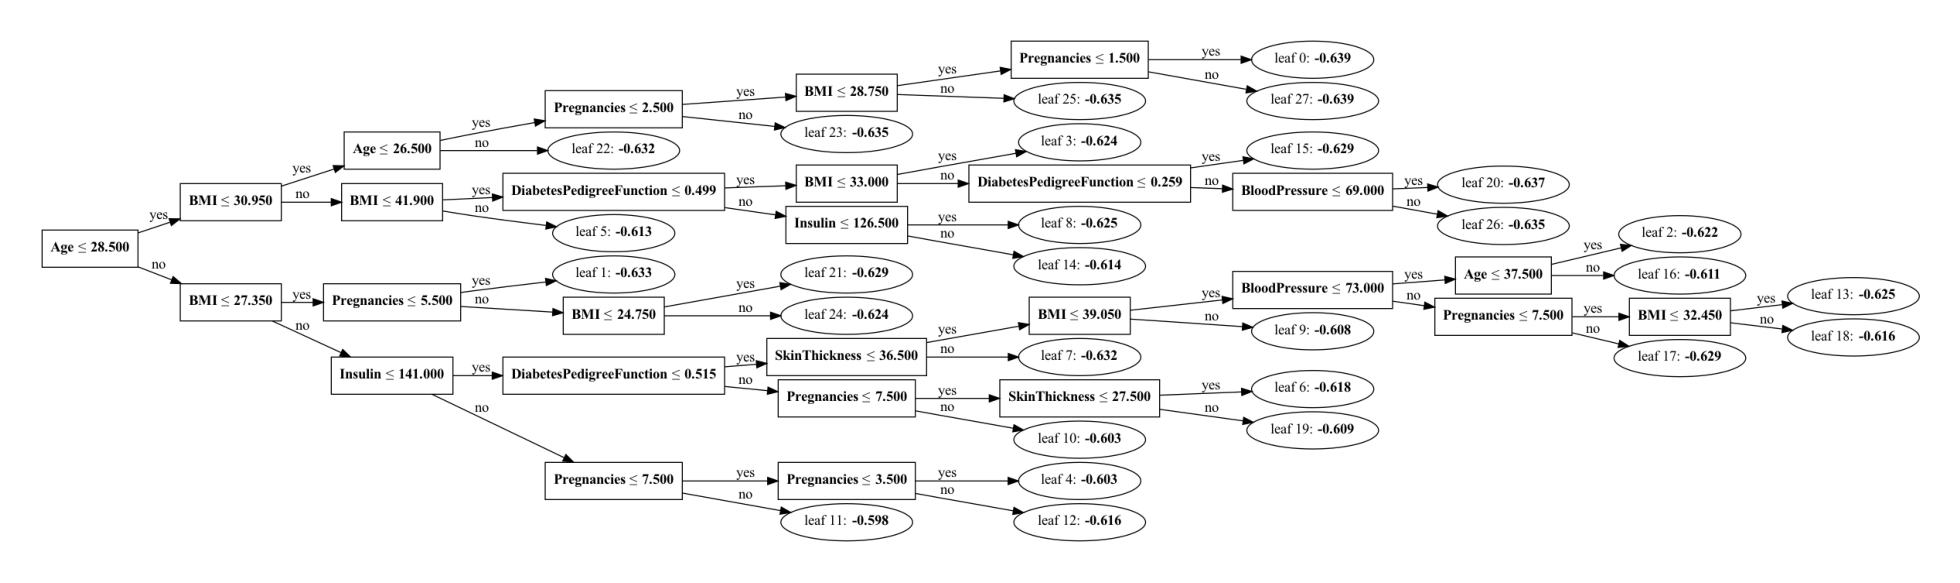

In [75]:
# Ağacımıza bakalım;

plot_tree(lgbm_final, dpi=380)

In [76]:
# Final modeli 5 katlı cross validate edelim;

cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [77]:
# İkinci hiper parametre optimizasyonu sonrasında accuracy ortalamalarına bakalım;

cv_results['test_accuracy'].mean()

# Önceki değerimiz 0.7643'tü.

0.7643833290892115

In [78]:
# İkinci hiper parametre optimizasyonu sonrasında f1 skoru ortalamalarına bakalım;

cv_results['test_f1'].mean()

# Önceki değerimiz 0.6372'tü.

0.6193071162618689

In [79]:
# İkinci hiper parametre optimizasyonu sonrasında AUC değeri ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

# Önceki değerimiz 0.8147'ydi.

0.8227931516422082

        İkinci hiper parametre optimizasyonu sonrasında çok da fazla bir değişiklik gözlemleyemedik.

In [80]:
# LightGBM'de "n_estimators" sayısını, 10.000'lere kadar arttırabiliriz. Bunu da tavsiye ediyoruz.
# Zira bu yöntemler gelişmiş ağaç yöntemleridir ve çok büyük veri setlerinde çalışabilir.
# "n_estimators" neydi hatırlayalım, fit edilecek ağaç sayısıydı. 
# Bu sebeple fit edilecek ağaç sayısını ne kadar arttırırsak o kadar seçenek denemiş oluruz.

# Bu sebeple yeni bir LightGBM model nesnesi tanımlayalım ve 
# "n_estimatiors" hariç diğer hiper parametreleri içine gönderelim;

lgbm_model = LGBMClassifier(random_state=17, colsample_bytree=0.9, learning_rate=0.01)

In [81]:
# Denenecek hiper parametreleri tanımlayalım;

lgbm_params = {"n_estimators": [200, 400, 1000, 5000, 8000, 9000, 10000]}

In [82]:
# GridSearchCV ile bu hiper parametreyi deneyelim;

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [83]:
# En iyi hiper parametreye bakalım;

lgbm_best_grid.best_params_

{'n_estimators': 200}

        "n_estimators" sayısını, 10.000'lere kadar arttırmamıza rağmen en iyi sonucu {'n_estimators': 200}'de alıyoruz.

        Şu anda bulamadık ama başka bir problemde bulabiliriz.

# CatBoost Uygulama

Categorical Boosting ifadesinin kısaltılmışıdır. Kategorik değişkenlerle otomatik olarak mücadele edebilen, hızlı, başarılı bir diğer GBM algoritmasıdır.

Feature encoding'den hatırlıyoruz ki, biz kategorik değişkenleri one-hot veya label encode ediyorduk. Özellikle on-hot encode ettiğimizde bir anda data setimizde çok hızlı değişke türüyordu. 

        CatBoost için kategorik değişken destekli bir boosting yöntemi olduğunu söyleyebiliriz.

Çalışmanın yukarısında LightGBM'in iyi bilinmesi önerilmişti. Lakin, bazı seneryolarda CatBoost algoritmasının başarılı olabileceğini unutmamak garekir.

In [84]:
# Model nesnemizi tanımlayalım;

catboost_model = CatBoostClassifier(random_state=17, verbose=False)

In [85]:
# Hiper parametre optimizasyonu yapmadan modelimiz kuralım;

cv_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [86]:
# accuracy ortalamalarına bakalım;

cv_results['test_accuracy'].mean()

0.7735251676428148

In [87]:
# f1 skoru ortalamalarına bakalım;

cv_results['test_f1'].mean()

0.6502723851348231

In [88]:
# AUC değeri ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

0.8378923829489867

In [89]:
# LightGBM sonuçlarını hatırlayalım;

# Accuracy    = 0.7643
# F1 score    = 0.6372
# AUC değeri  = 0.8147

    Bu veri seti için hiç bir optimizasyon yapmadan LightGBM'den iyi olduğunu görebiliyoruz.

In [90]:
# Hiper parametre ızgarasını tanımlayalım;

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

In [91]:
# Hiper parametrelerimizi deneyelim;

catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [92]:
# En iyi hiper parametrelere bakalım;

catboost_best_grid.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.01}

In [93]:
# Final modelimizi kuralım;

catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

In [94]:
# Modelimizi 5 Katlı cross validate edelim;

cv_results = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [95]:
# Hiper parametre optimizasyonu sonrasında accuracy ortalamalarına bakalım;

cv_results['test_accuracy'].mean()

# Önceki değerimiz 0.7735'ti.

0.7721755368814192

In [96]:
# Hiper parametre optimizasyonu sonrasında f1 skoru ortalamalarına bakalım;

cv_results['test_f1'].mean()

# Önceki değerimiz 0.6502'ydi.

0.6322580676028952

In [97]:
# Hiper parametre optimizasyonu sonrasında AUC değeri ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

# Önceki değerimiz 0.8378'di.

0.842001397624039

In [98]:
################################################
# Feature Importance
################################################

In [99]:
# Daha önceden kullanmış olduğumuz bir fonksiyonu çağıralım;

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

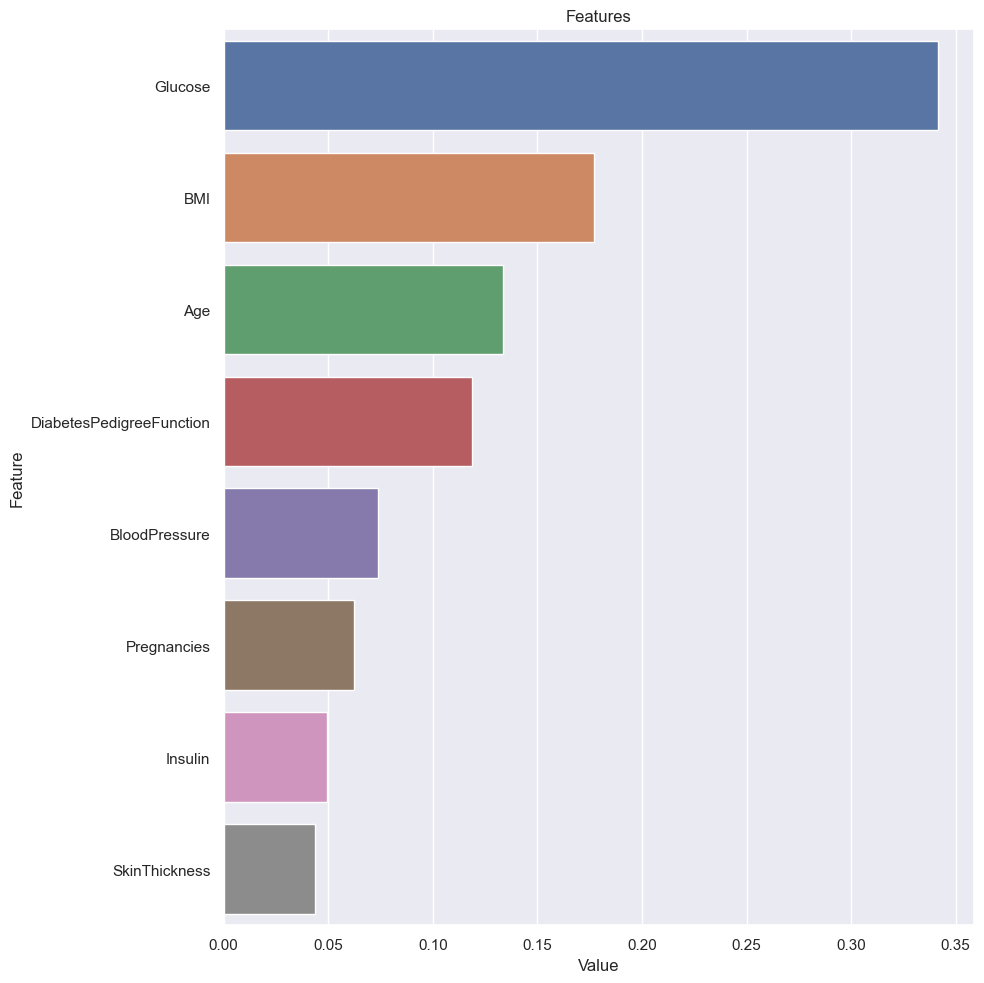

In [100]:
# Random forest modelinin feature'larını inceleyelim;

plot_importance(rf_final, X)

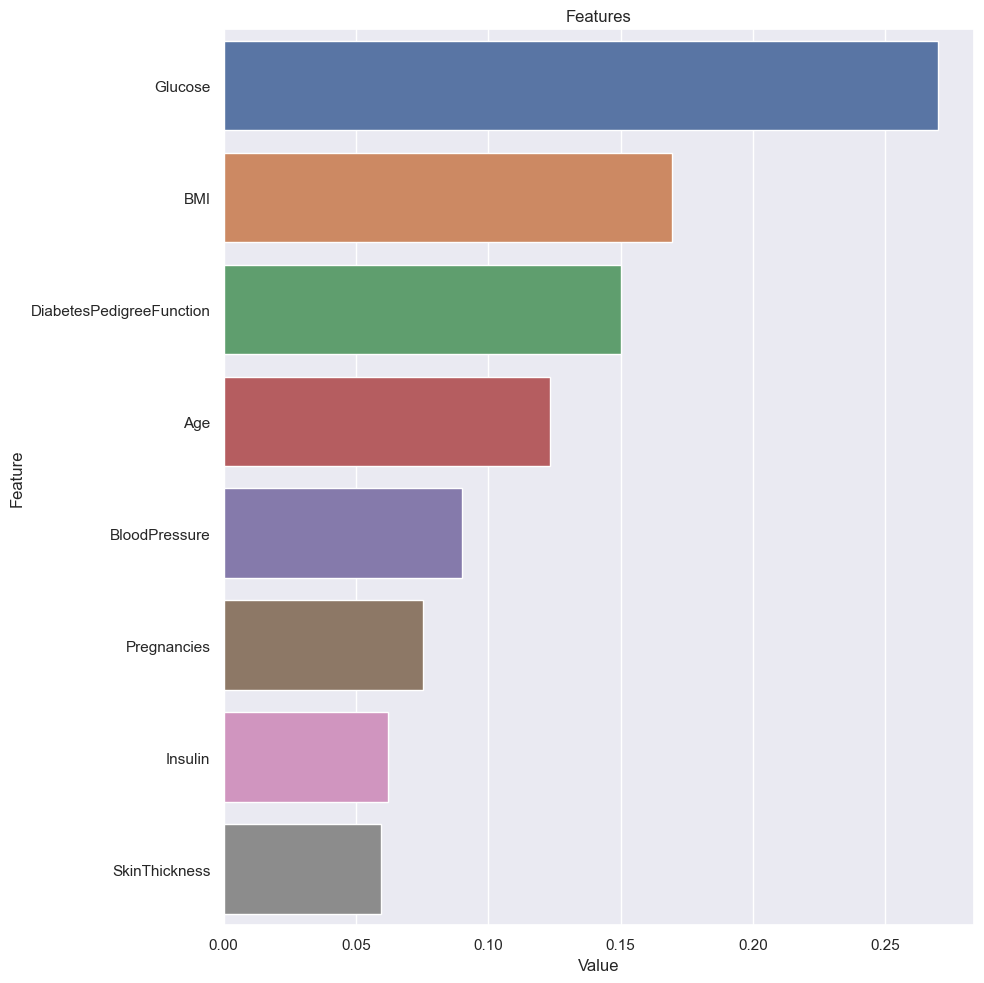

In [101]:
# GBM modelinin feature'larını inceleyelim;

plot_importance(gbm_final, X)

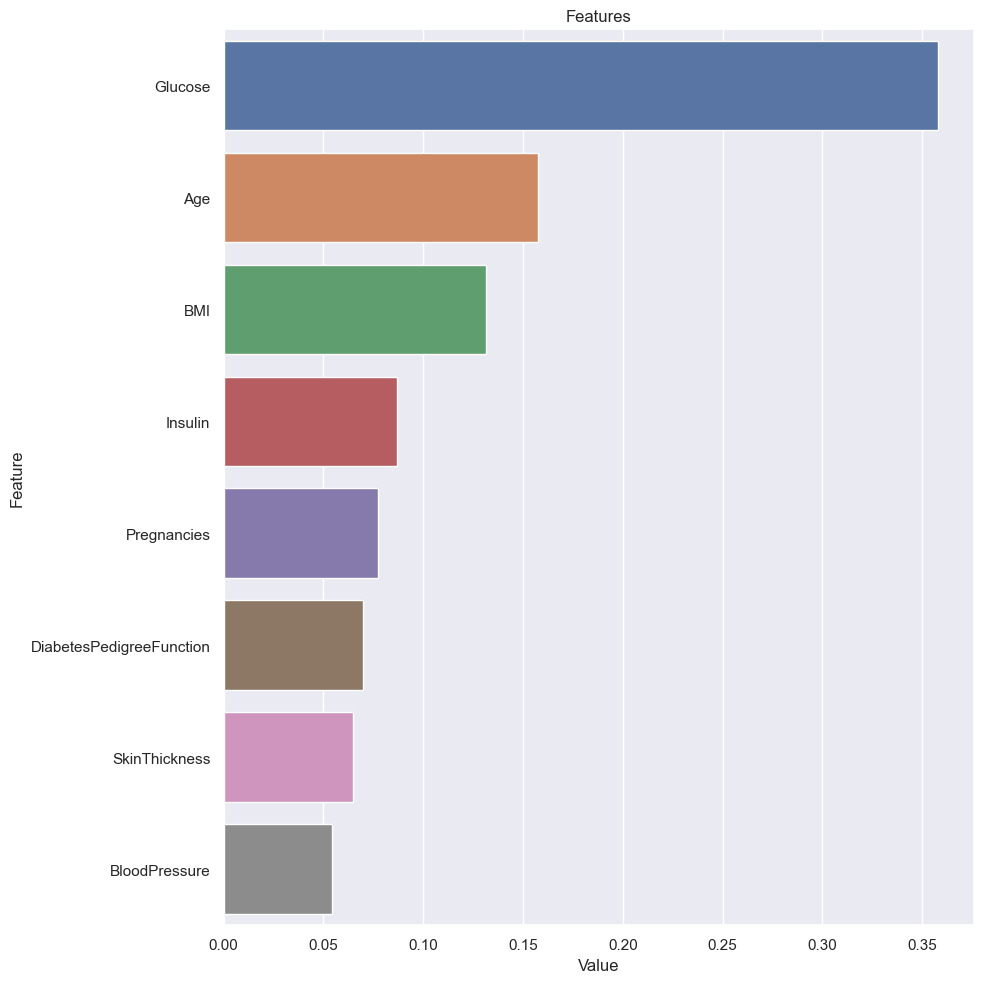

In [102]:
# XGBoost modelinin feature'larını inceleyelim;

plot_importance(xgboost_final, X)

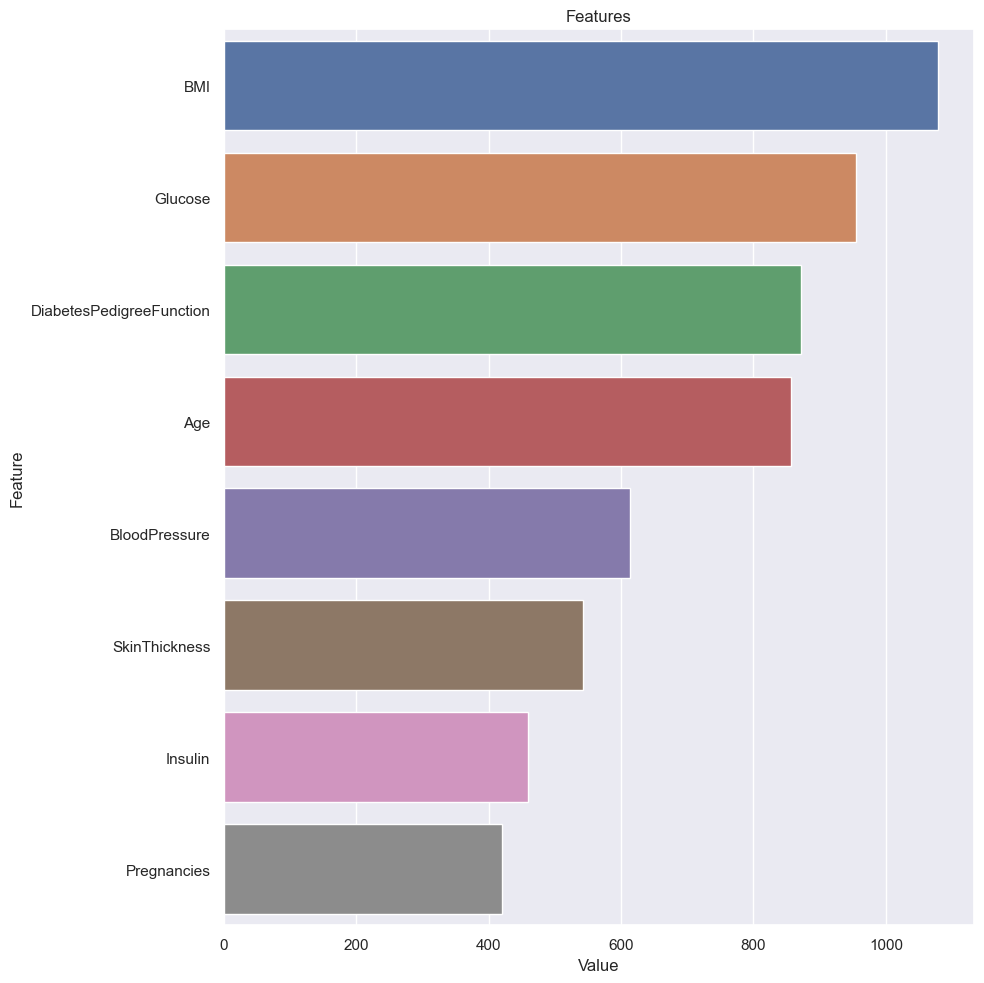

In [103]:
# LightGBM modelinin feature'larını inceleyelim;

plot_importance(lgbm_final, X)

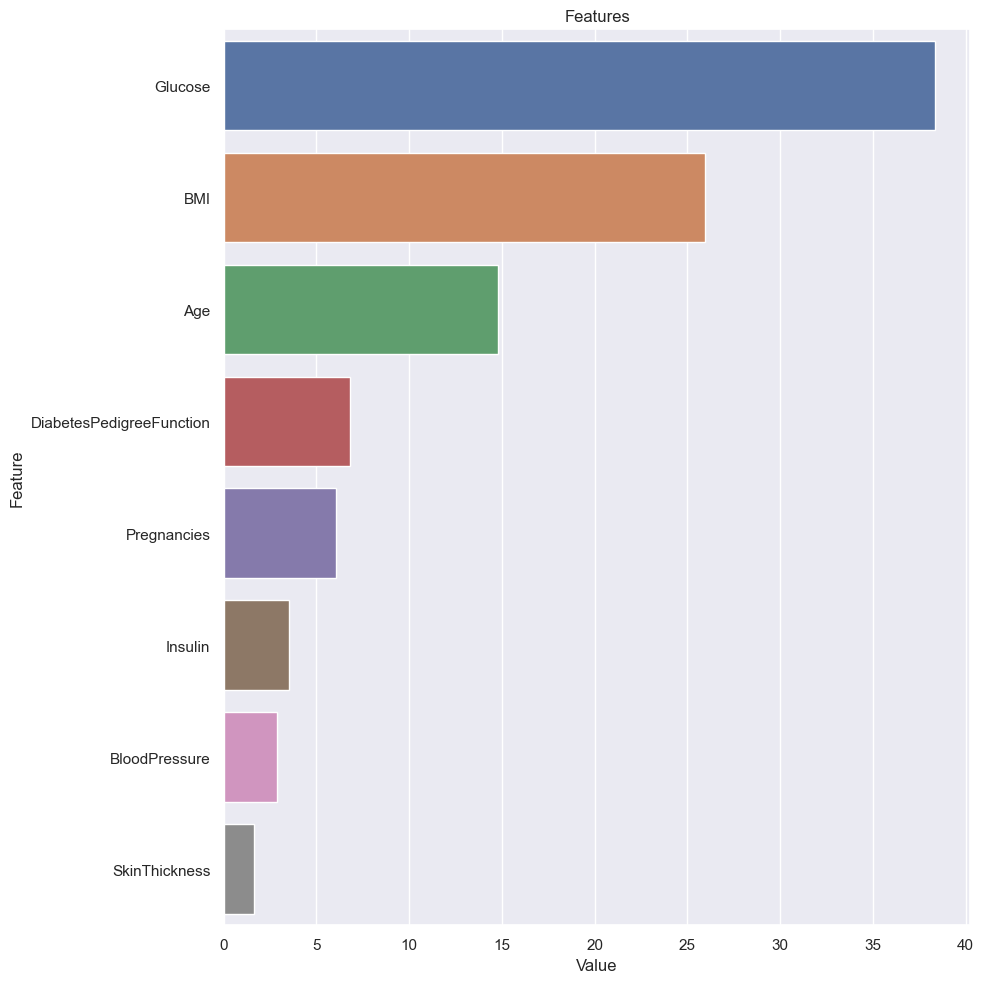

In [104]:
# CatBoost modelinin feature'larını inceleyelim;

plot_importance(catboost_final, X)

In [105]:
################################
# Hyperparameter Optimization with RandomSearchCV (BONUS)
################################

In [106]:
# Daha önceden "GridSearchCV()" ile tanımladığımız hiper parametrelerin bütün kombinasyonlarını tek tek deniyorduk.

# "RandomSearchCV()" ise tanımlayacağımız bir hiper parametre seti içerisinden rasgele seçimler yapar ve 
# bu rasgele seçimleri arar. 

        Örnek olarak bir random forest modelinde "RandomSearchCV()"yi bir deneyelim;

In [107]:
# Model nesnemizi oluşturuyoruz;

rf_model = RandomForestClassifier(random_state=17)

In [108]:
# Deneyeceğimiz hiper parametreleri tanımlayalım;

rf_random_params = {"max_depth": np.random.randint(5, 50, 10),
                    "max_features": [3, 5, 7, "auto", "sqrt"],
                    "min_samples_split": np.random.randint(2, 50, 20),
                    "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=10)]}

GridSearchCV bütün kombinasyonları denediği için çalışması daha uzun sürer, lakin olası en iyi parametreleri bulma ihtimali daha yüksektir. Diğer bir yandan RandomizedSearchCV ise daha fazla, daha geniş bir hiper parametre değişkenleri arasından rasgele bir seçim yapar ve bu seçim arasından hangisinin daha iyi olduğunu bulur.

Burada şöyle bir tavsiye sunulabilir, daha öncesinden veri setini tanıma imkanı bulunamamışsa, RandomizedSearchCV ile gidilecek yön tayin edilebilir, hiper parametre ızgarası küçültülür. Daha sornrasında GridSearchCV ile daha accurate bir arama yapılabilir.

In [110]:
# "RandomSearchCV()" ile yukarıda tanımladığımız hiper parametreleri deneyelim;

rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_random_params,
                               n_iter=100,  # denenecek parametre sayısı
                               cv=3,
                               verbose=True,
                               random_state=42,
                               n_jobs=-1)

rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=17),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([41, 49, 41, 25, 35, 46,  8, 23, 32, 33]),
                                        'max_features': [3, 5, 7, 'auto',
                                                         'sqrt'],
                                        'min_samples_split': array([42,  7, 40, 49,  6, 37, 18,  4, 13, 41, 47, 11, 33,  5, 41, 38, 44,
       18, 12, 20]),
                                        'n_estimators': [200, 344, 488, 633,
                                                         777, 922, 1066, 1211,
                                                         1355, 1500]},
                   random_state=42, verbose=True)

In [111]:
# En iyi parametrelerimize bakalım;

rf_random.best_params_

{'n_estimators': 633,
 'min_samples_split': 6,
 'max_features': 'sqrt',
 'max_depth': 25}

        Yukarıda en iyi parametreleri buldu lakin iyi hiper parametreler mi değil mi kontrol etmemiz gerekiyor.

In [113]:
# Fina modeli kuralım;

rf_random_final = rf_model.set_params(**rf_random.best_params_, random_state=17).fit(X, y)

In [114]:
# 5 katlı cross validate edelim;

cv_results = cross_validate(rf_random_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [115]:
# Test accuracy ortalamalarına bakalım;

cv_results['test_accuracy'].mean()

0.770927765045412

In [116]:
# F1 skoru ortalamalarına bakalım;

cv_results['test_f1'].mean()

0.6427247846212273

In [117]:
# AUC değeri ortalamalarına bakalım;

cv_results['test_roc_auc'].mean()

0.8316897274633124

In [118]:
################################
# Analyzing Model Complexity with Learning Curves (BONUS)
################################

In [120]:
# Hiper parametre ızgarasını tanımlayalım;

rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                 ["max_features", [3, 5, 7, "auto"]],
                 ["min_samples_split", [2, 5, 8, 15, 20]],
                 ["n_estimators", [10, 50, 100, 200, 500]]]

In [121]:
# Model nesnemizi tanımlayalım;

rf_model = RandomForestClassifier(random_state=17)

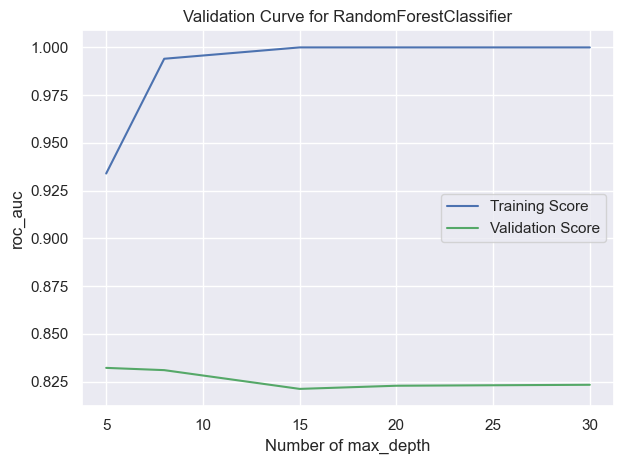

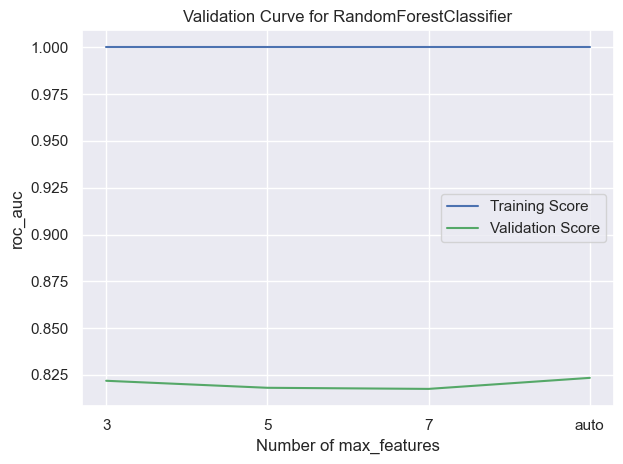

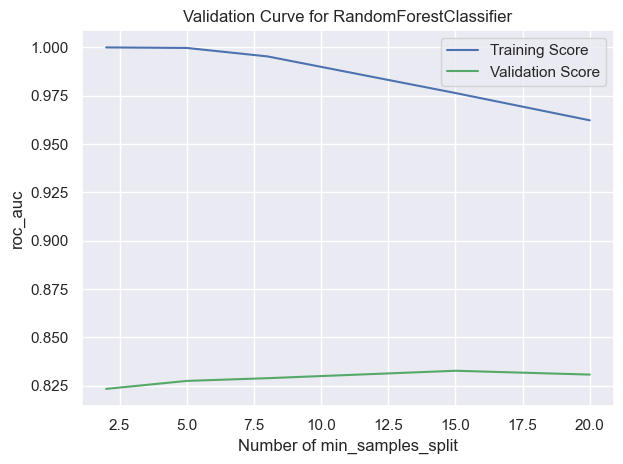

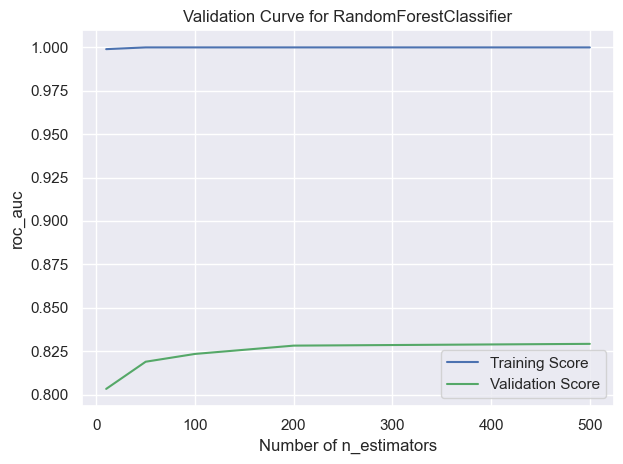

In [122]:
for i in range(len(rf_val_params)):
    val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1])

In [123]:
rf_val_params[0][1]

[5, 8, 15, 20, 30, None]